Dataset Shape: (569, 30)
Classes: ['malignant' 'benign']

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.99737962659679


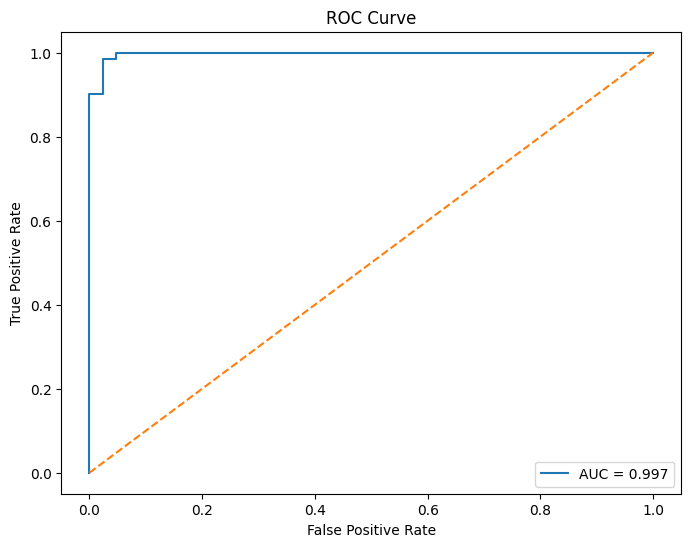

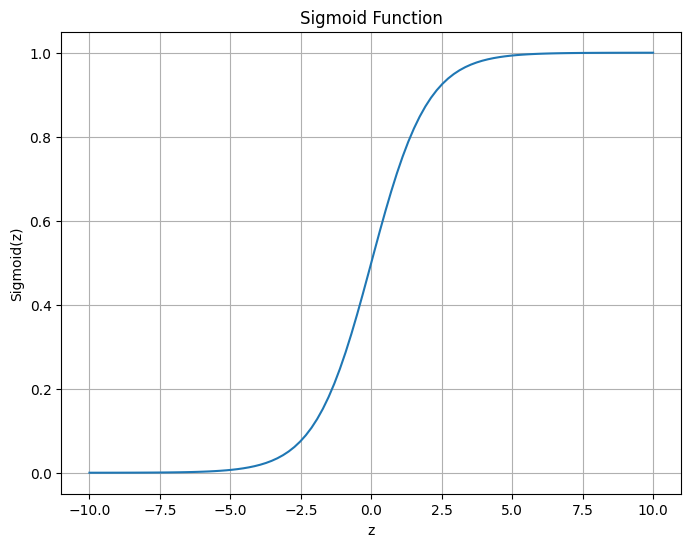


Confusion Matrix with Threshold 0.4:
 [[41  2]
 [ 0 71]]


In [1]:
# =====================================
# Task 4: Logistic Regression
# =====================================

# 1️⃣ Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# 2️⃣ Load Dataset (Breast Cancer - Binary Classification)
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset Shape:", X.shape)
print("Classes:", data.target_names)

# 3️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4️⃣ Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5️⃣ Train Logistic Regression Model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# 6️⃣ Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]   # Probabilities

# =====================================
# Evaluation
# =====================================

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)

# =====================================
# ROC Curve Plot
# =====================================
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# =====================================
# Sigmoid Function Visualization
# =====================================

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.figure(figsize=(8,6))
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()

# =====================================
# Threshold Tuning Example
# =====================================

custom_threshold = 0.4
y_pred_custom = (y_prob >= custom_threshold).astype(int)

print("\nConfusion Matrix with Threshold 0.4:\n",
      confusion_matrix(y_test, y_pred_custom))